# Partial withdraws

In [ ]:
rm(list = ls())
gc()

          used (Mb) gc trigger (Mb) max used (Mb)
Ncells  837225 44.8    1610882 86.1  1210165 64.7
Vcells 1654718 12.7    8388608 64.0  2768516 21.2

In [ ]:
con <- DBI::dbConnect(duckdb::duckdb(),
                      dbdir = "temp1.duckdb")


withdraws <- here("data/temp/withdraws_clean.feather") |>
    open_dataset(format = "feather") 

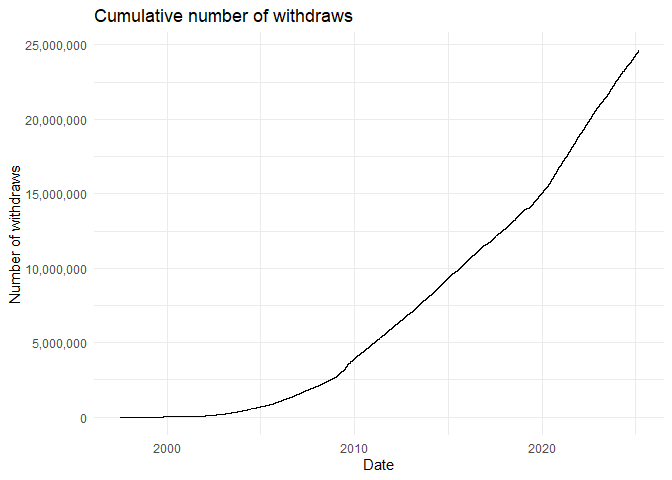

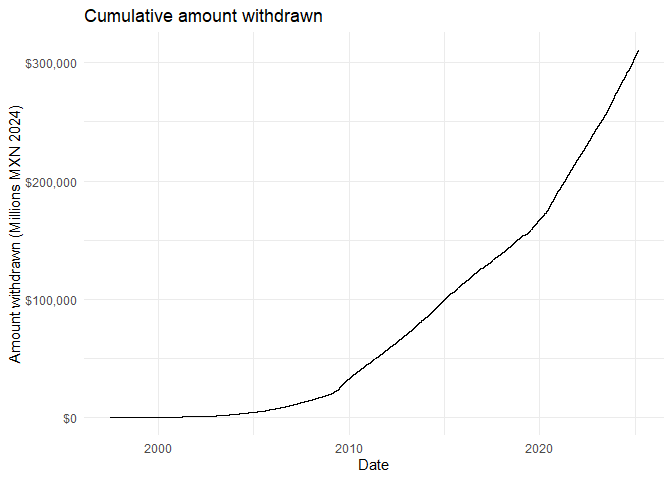

In [ ]:
withdraws |>
    summarise(
        .by = rpd_date,
        n = n()
    ) |>
    collect() |>
    arrange(rpd_date) |>
    mutate(n = cumsum(n)) |>
    ggplot(aes(x = rpd_date, y = n)) +
    geom_step() +
    labs(
        title = "Cumulative number of withdraws",
        x = "Date",
        y = "Number of withdraws"
    ) +
    scale_y_continuous(labels = scales::comma) 

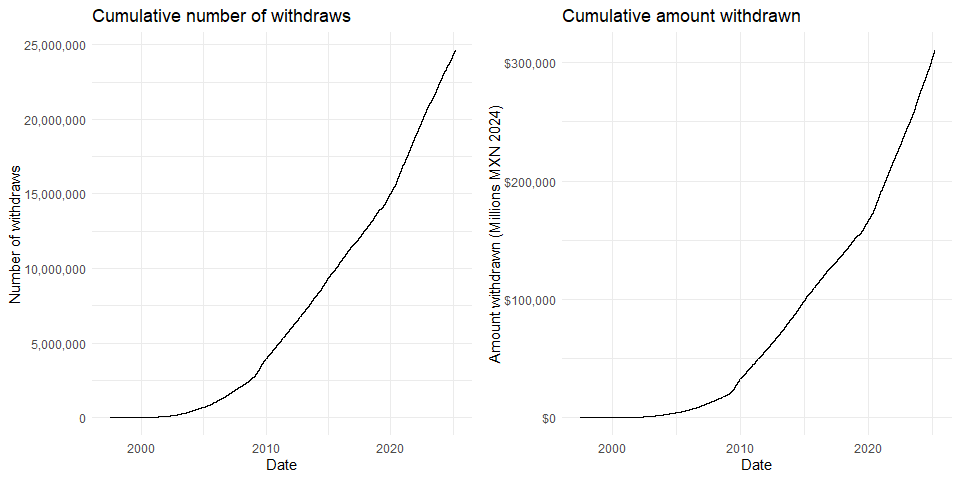

In [ ]:
#| label: fig-rpd
#| fig-cap: Cumulative usage of the RPD scheme
#| fig-height: 5
#| fig-width: 10

left <- withdraws |>
    summarise(
        .by = rpd_date,
        n = n()
    ) |>
    collect() |>
    arrange(rpd_date) |>
    mutate(n = cumsum(n)) |>
    ggplot(aes(x = rpd_date, y = n)) +
    geom_step() +
    labs(
        title = "Cumulative number of withdraws",
        x = "Date",
        y = "Number of withdraws"
    ) +
    scale_y_continuous(labels = scales::comma) 

right <- withdraws |>
    summarise(
        .by = rpd_date,
        n = sum(amount_withdrawn)
    ) |>
    collect() |>
    arrange(rpd_date) |>
    mutate(n = cumsum(n)) |>
    ggplot(aes(x = rpd_date, y = n)) +
    geom_step() +
    labs(
        title = "Cumulative amount withdrawn",
        x = "Date",
        y = "Amount withdrawn (Millions MXN 2024)"
    ) +
    scale_y_continuous(labels = scales::dollar_format(scale = 1e-6)) 


ggarrange(left, right)

In [ ]:
unemployment <- here("data/working/rd_unemployment_rpd") |>
    open_dataset(format = "parquet")

glimpse(unemployment)

FileSystemDataset with 1 Parquet file
28,047,656 rows x 27 columns
$ CVE_NSS                                  <int64> 1006300030, 1006400665, 10064…
$ began_working                      <date32[day]> 2016-01-14, 2014-06-16, 2014-…
$ unemployment_days            <decimal128(18, 3)> 2210, 335, 105, 3, 48, 33, 94…
$ unemployment_date                  <date32[day]> 2018-12-31, 2014-08-01, 2017-…
$ meets_unemp_days_criterion   <decimal128(18, 3)> 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,…
$ days_since_account_opened    <decimal128(18, 3)> 1083, 47, 977, 1139, 1327, 14…
$ meets_account_days_criterion <decimal128(18, 3)> 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,…
$ ever_got_unemployed                     <double> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ covid                                   <double> 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,…
$ interest_event                <decimal128(2, 1)> 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,…
$ interest_worker              <decimal128(18, 3)> 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ contribution_days            

[1] 0.1016284